# Oasis Infotech - DATA ANALYTICS INTERNSHIP

## Name: Prajakta Shivanand Karate

## Task - 02

## Project Title: Predicting House Prices with Linear Regression

## Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


## Data Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.shape

(545, 13)

In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## Data Cleaning

In [10]:
# Checking Null values
df.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Exploratory data analysis

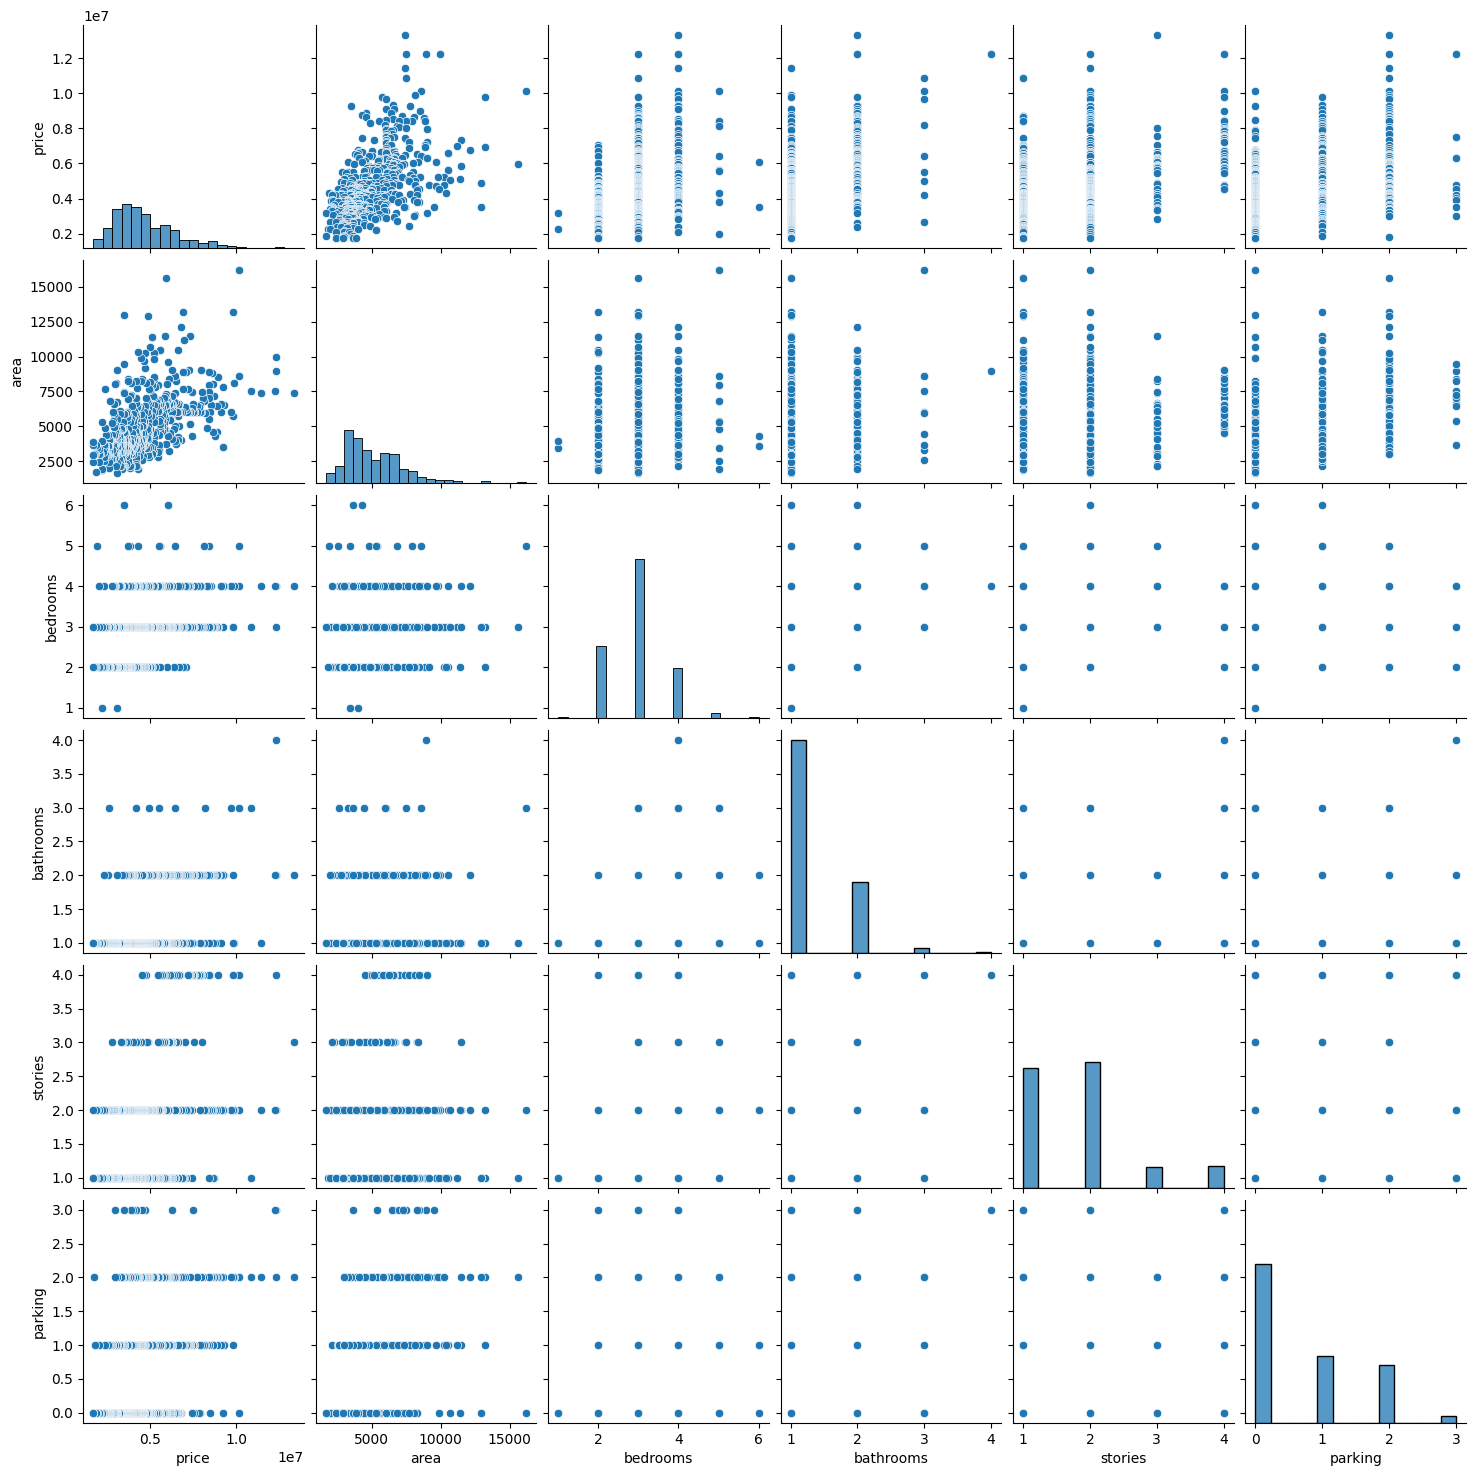

In [11]:
sns.pairplot(df)
plt.show()

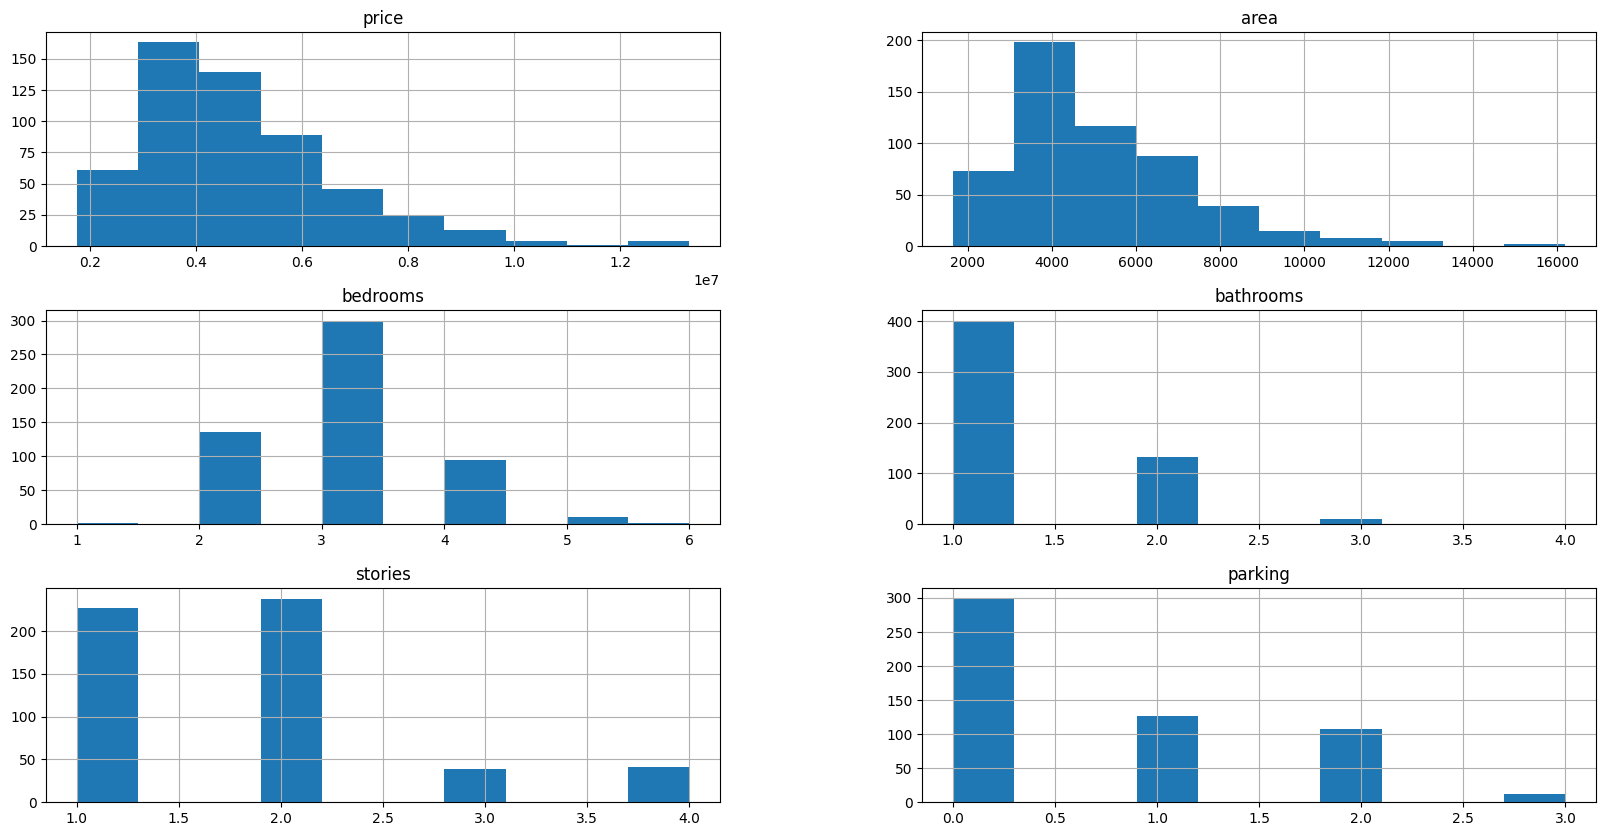

In [12]:
df.hist(figsize=(20,10))
plt.show()

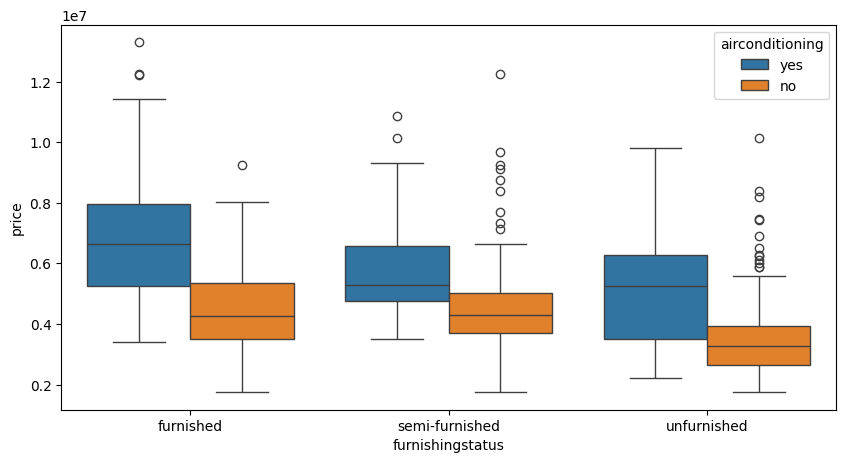

In [13]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)
plt.show()

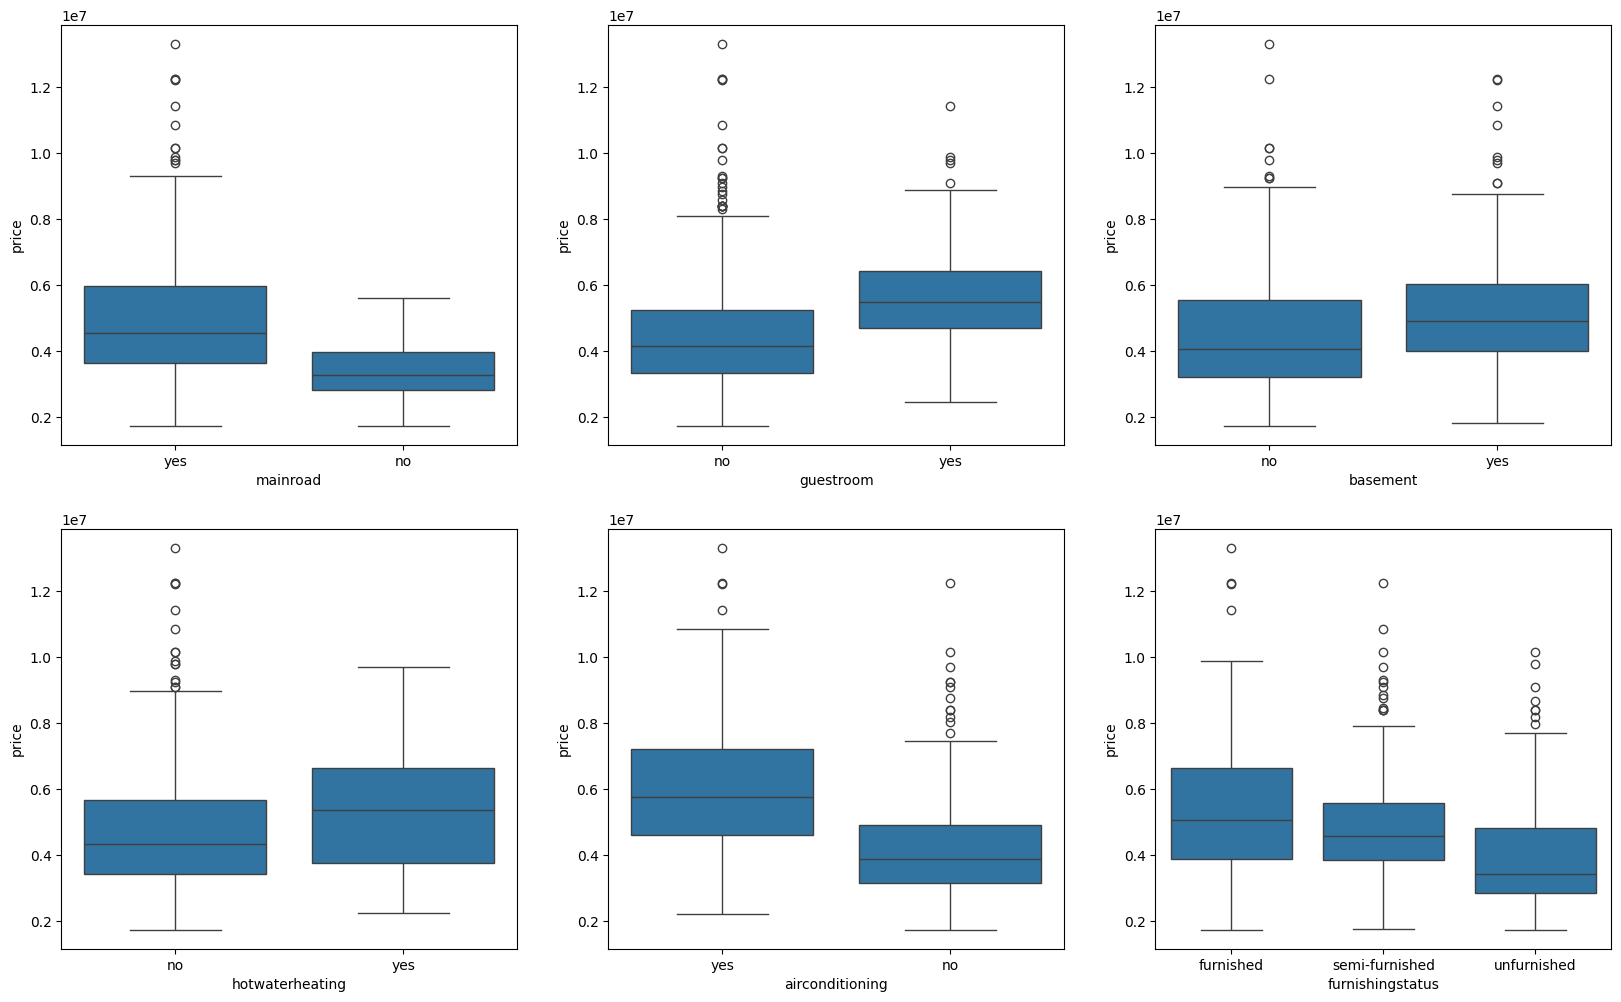

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

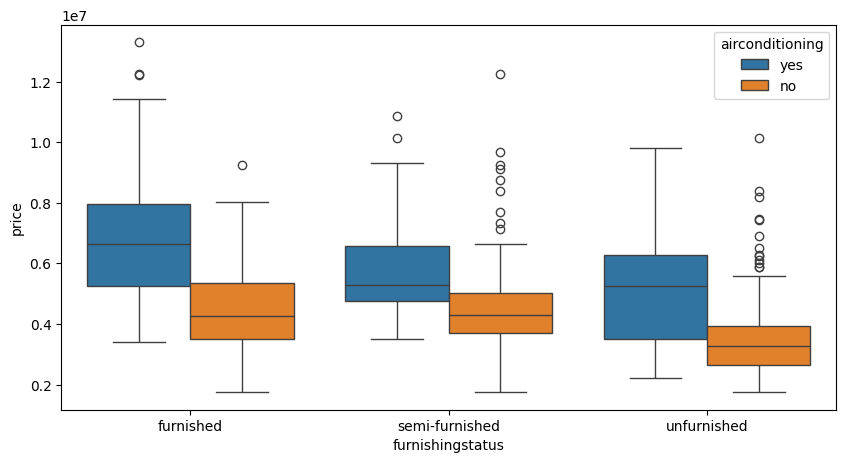

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)
plt.show()

## Outlier Analysis

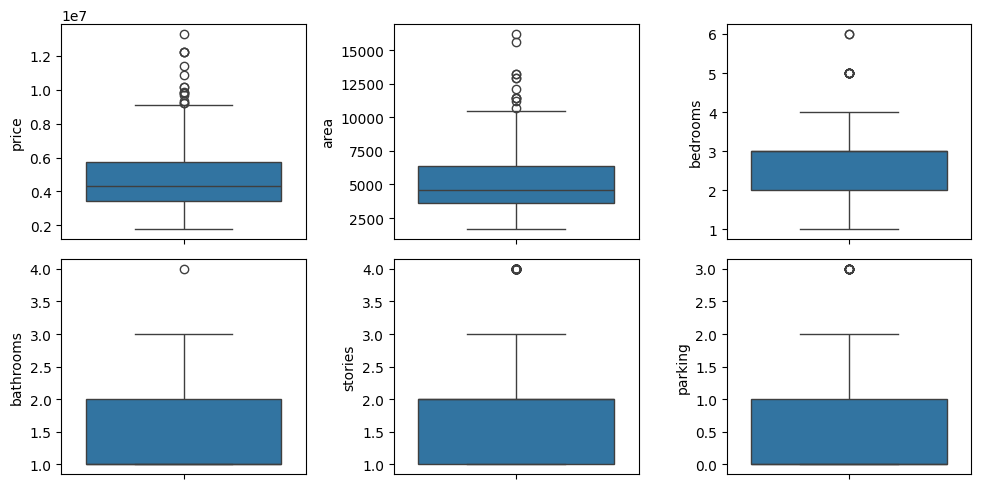

In [16]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

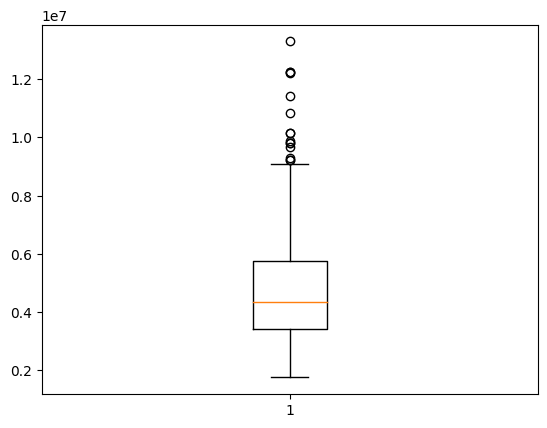

In [17]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.

# outlier treatment for price
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

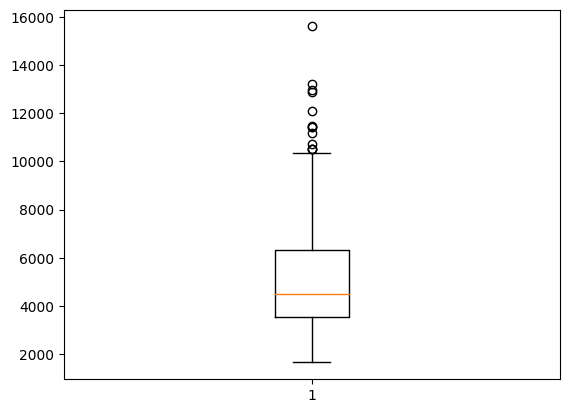

In [18]:
# outlier treatment for area
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

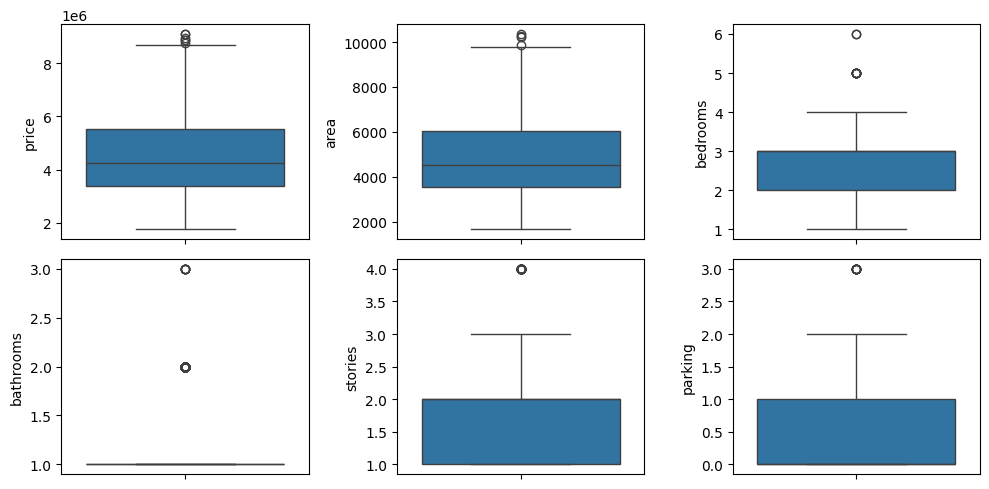

In [19]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

## Data Preparation

**You can see that your dataset has many columns with values as 'Yes' or 'No'.**

**But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.**

In [20]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [21]:
df[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
15,1,0,1,0,0,0
16,1,1,1,0,1,1
17,1,0,0,0,1,0
18,1,1,0,0,1,0
19,1,0,0,0,1,1


In [22]:
# Check the housing dataframe now
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


## Dummy Variables

**The variable furnishingstatus has three levels. We need to convert these levels into integer as well.**

**For this, we will use something called dummy variables.**

In [23]:
status = pd.get_dummies(df['furnishingstatus'], dtype=int)
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [24]:
status = pd.get_dummies(df['furnishingstatus'], dtype=int, drop_first = True)

In [25]:
data = pd.concat([df, status], axis = 1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [26]:
data.drop(['furnishingstatus'], axis = 1, inplace = True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [27]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.533186,0.335328,0.466483,0.446839,0.307185,0.303994,0.190117,0.075979,0.471706,0.321058,0.280808,0.085766,-0.278463
area,0.533186,1.000000,0.127745,0.171528,0.109877,0.302116,0.213826,0.042227,-0.020489,0.264680,0.357276,0.208014,0.010588,-0.121219
bedrooms,0.335328,0.127745,1.000000,0.346230,0.406684,-0.025775,0.078443,0.102261,0.042953,0.150378,0.105561,0.061014,0.056241,-0.122155
bathrooms,0.466483,0.171528,0.346230,1.000000,0.311314,0.024614,0.152035,0.124691,0.046486,0.175634,0.127102,0.027817,0.024132,-0.129211
stories,0.446839,0.109877,0.406684,0.311314,1.000000,0.120759,0.034301,-0.166031,0.027834,0.293854,0.022043,0.021529,-0.004171,-0.085689
mainroad,0.307185,0.302116,-0.025775,0.024614,0.120759,1.000000,0.095201,0.041789,-0.019471,0.102198,0.195635,0.193613,0.011257,-0.125560
guestroom,0.303994,0.213826,0.078443,0.152035,0.034301,0.095201,1.000000,0.373599,-0.022922,0.139242,0.041133,0.184999,0.007601,-0.108383
basement,0.190117,0.042227,0.102261,0.124691,-0.166031,0.041789,0.373599,1.000000,-0.012428,0.034796,0.038480,0.229180,0.054119,-0.108168
hotwaterheating,0.075979,-0.020489,0.042953,0.046486,0.027834,-0.019471,-0.022922,-0.012428,1.000000,-0.119731,0.052510,-0.041079,0.074875,-0.049550
airconditioning,0.471706,0.264680,0.150378,0.175634,0.293854,0.102198,0.139242,0.034796,-0.119731,1.000000,0.129590,0.087044,-0.043557,-0.086983


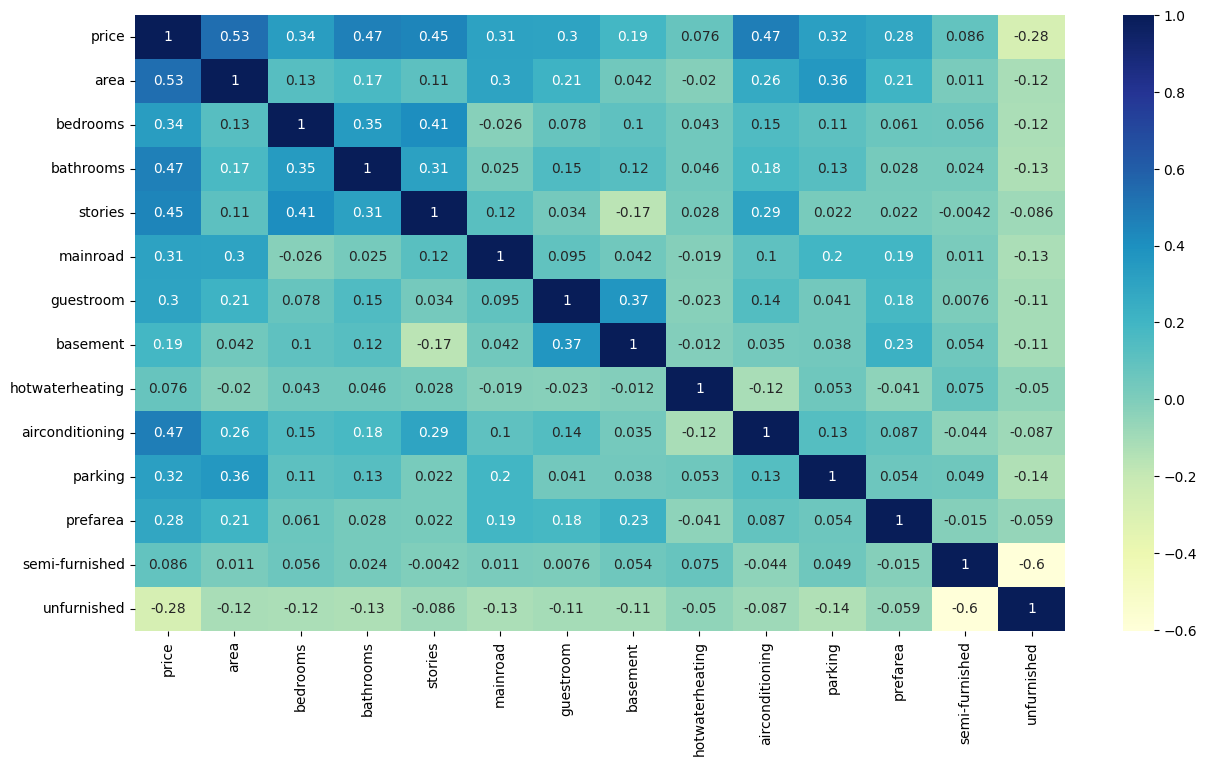

In [28]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [29]:
# Spitting data into Testing & Trainning Data Separately
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
440,0.201905,0.224018,0.6,0.0,0.333333,1,0,1,0,0,0.000000,0,0,1
359,0.266667,0.219400,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
451,0.190476,0.583141,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,1,0
415,0.223810,0.356236,0.4,0.0,0.333333,1,1,1,0,1,0.333333,0,0,0
177,0.475238,0.502309,0.4,0.0,0.000000,1,0,1,0,0,0.000000,1,1,0


In [33]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.00000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,0.380071,0.360160,0.387893,0.128329,0.259080,0.871671,0.162228,0.35109,0.046005,0.292978,0.217111,0.200969,0.457627,0.314770
std,0.213500,0.200796,0.149915,0.229492,0.280384,0.334862,0.369107,0.47789,0.209750,0.455681,0.281482,0.401211,0.498806,0.464987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.227619,0.207852,0.200000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.306236,0.400000,0.000000,0.333333,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.496536,0.400000,0.000000,0.333333,1.000000,0.000000,1.00000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


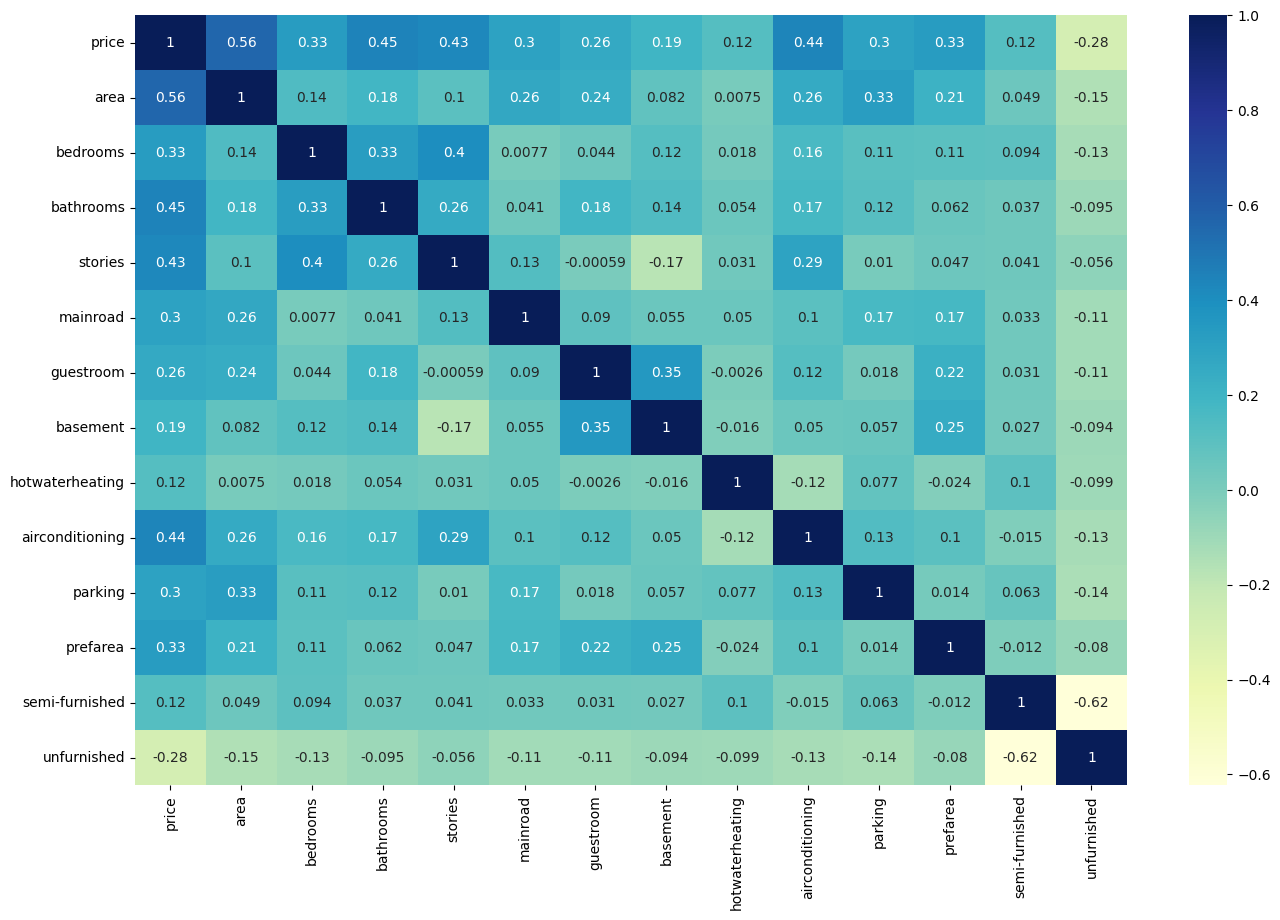

In [34]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [35]:
y_train = df_train.pop('price')
X_train = df_train

In [36]:
# Model Building
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
rfe = RFE(lm, step=6)
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 3),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 3),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 2),
 ('prefarea', True, 1),
 ('semi-furnished', False, 3),
 ('unfurnished', False, 3)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [41]:
#Building model using statsmodel, for the detailed statistics
X_train_rfe = X_train[col]

In [42]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [44]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     108.7
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.86e-81
Time:                        22:51:59   Log-Likelihood:                 250.00
No. Observations:                 413   AIC:                            -486.0
Df Residuals:                     406   BIC:                            -457.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0944      0.014     

In [45]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.83
5,airconditioning,1.19
3,stories,1.15
1,area,1.14
2,bathrooms,1.11
6,prefarea,1.05
4,hotwaterheating,1.02


## Residual Analysis of the train data

In [47]:
# Residual Analysis of the train data
y_train_price = lm.predict(X_train_rfe)

In [48]:
res = (y_train_price - y_train)

Text(0.5, 0, 'Errors')

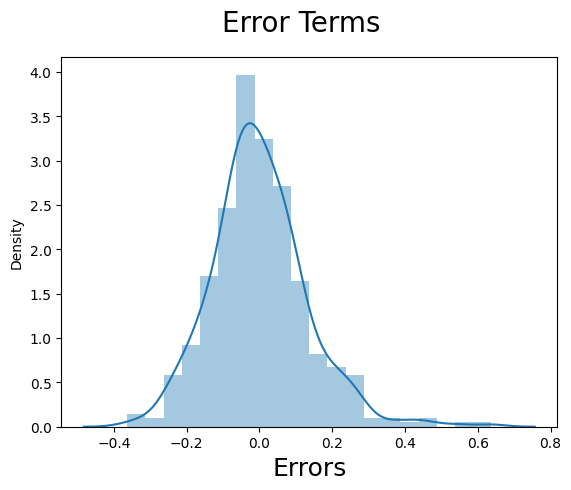

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                        

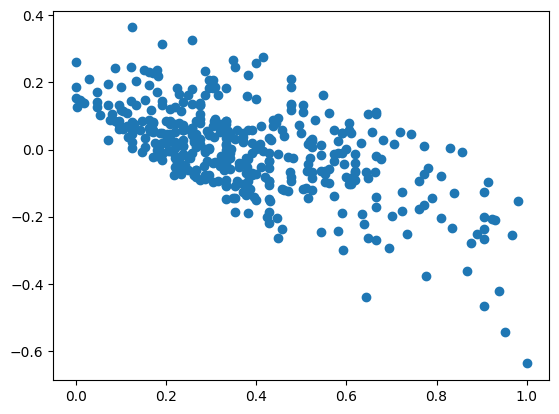

In [50]:
plt.scatter(y_train,res)
plt.show()

## Model Evaluation

**Applying the scaling on the test sets**

In [51]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [52]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [53]:
# Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [54]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [55]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [56]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [57]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [58]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5268104889039338

Text(0, 0.5, 'y_pred')

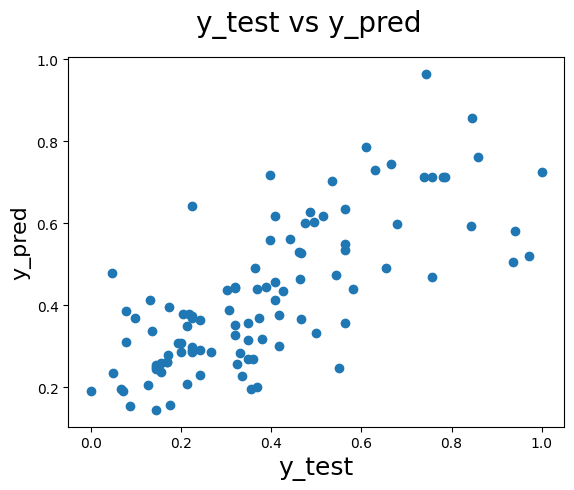

In [59]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)

## We can see that the equation of our best fitted line is:

**price=0.35×area+0.20×bathrooms+0.19×stories+0.10×airconditioning+0.10×parking+0.11×prefarea**